[Reference](https://towardsdatascience.com/python-text-analysis-with-the-schrutepy-package-234bc70f3916)

In [4]:
!pip install schrutepy

     |████████████████████████████████| 788kB 3.4MB/s 
     |████████████████████████████████| 358kB 8.8MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 2.6MB 11.3MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [5]:
from schrutepy import schrutepy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import collections
import pandas as pd

In [6]:
df = schrutepy.load_schrute()

In [7]:
df.head()

index  ...                                   text_w_direction
0      1  ...  All right Jim. Your quarterlies look very good...
1      2  ...         Oh, I told you. I couldn't close it. So...
2      3  ...  So you've come to the master for guidance? Is ...
3      4  ...         Actually, you called me in here, but yeah.
4      5  ...    All right. Well, let me show you how it's done.

[5 rows x 9 columns]

In [8]:
df = df.dropna()

There are 3001517 words in the combination of all review.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


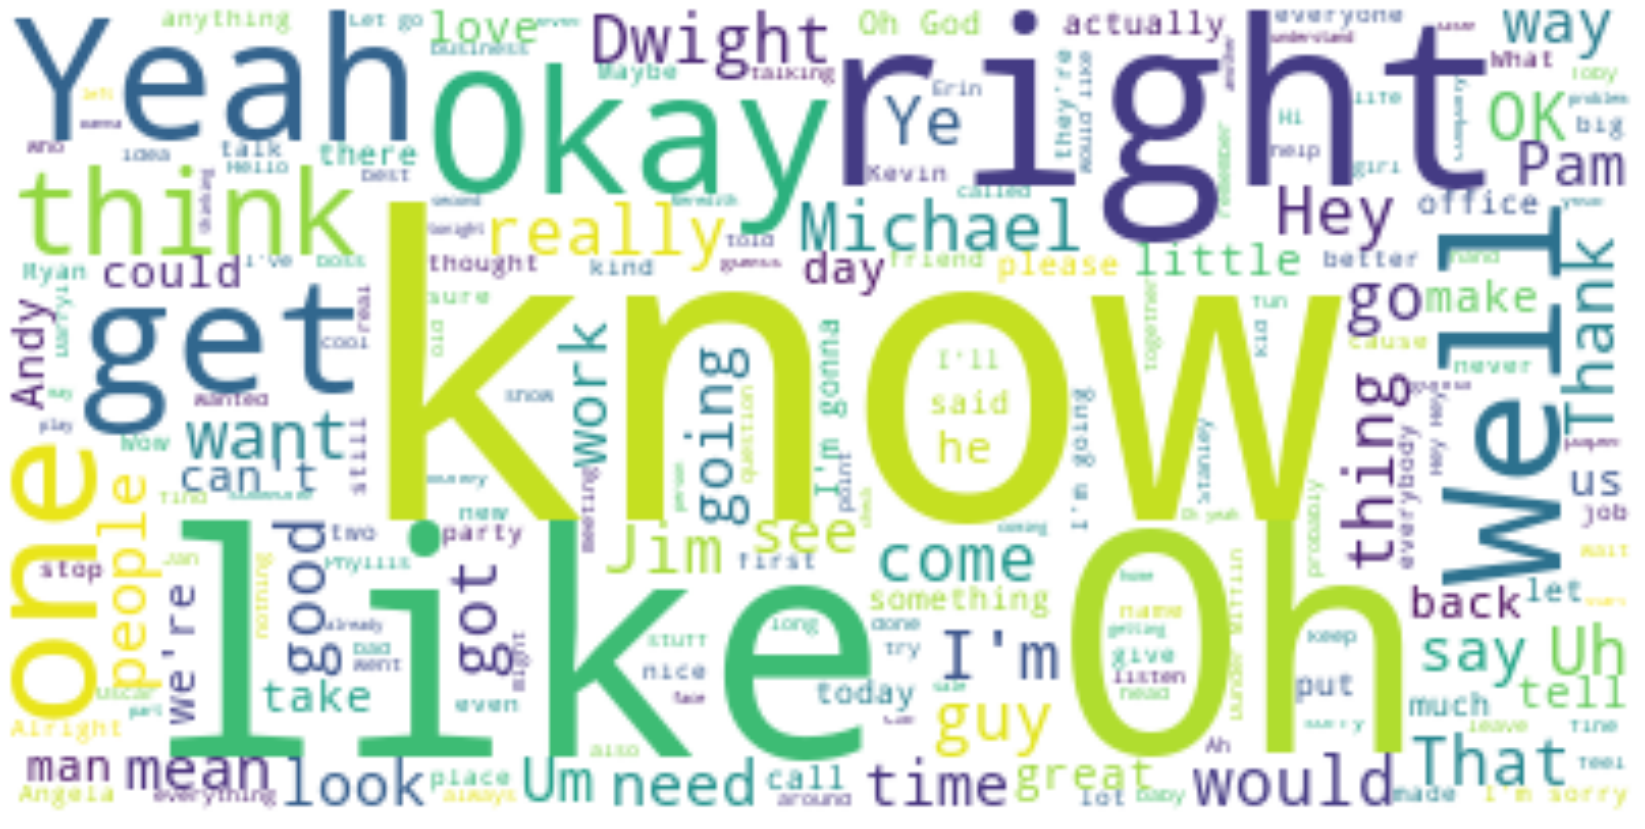

In [10]:
text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))#There are 3001517 words in the combination of all review.# Create stopword list:
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[30,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

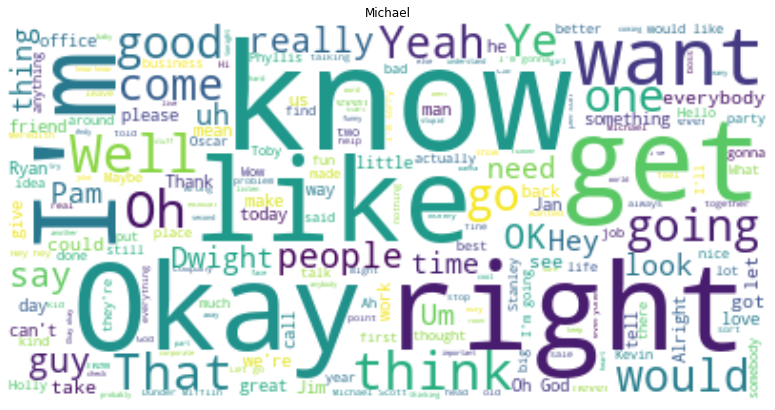

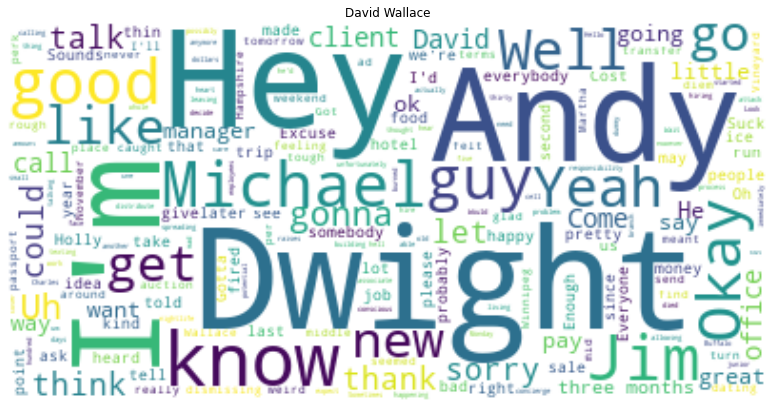

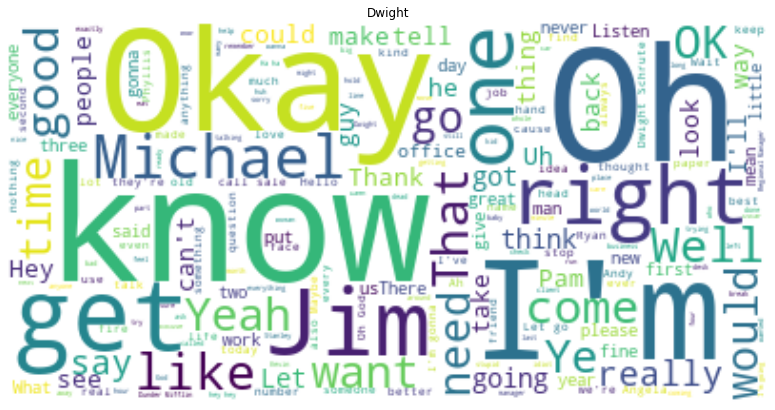

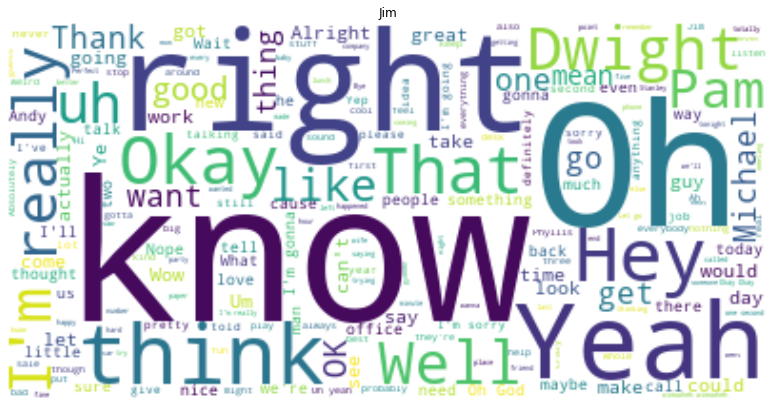

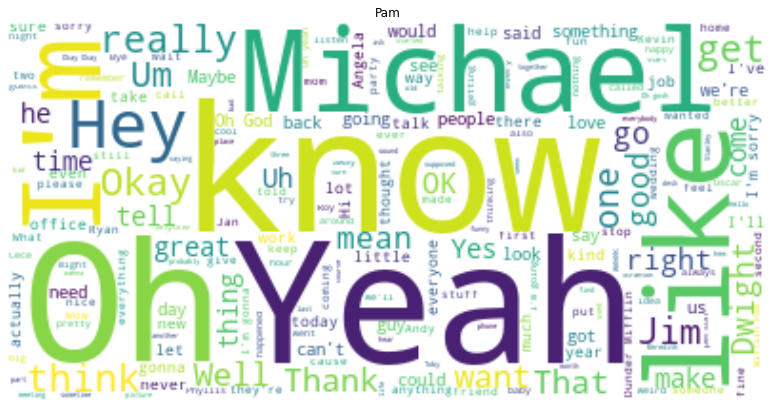

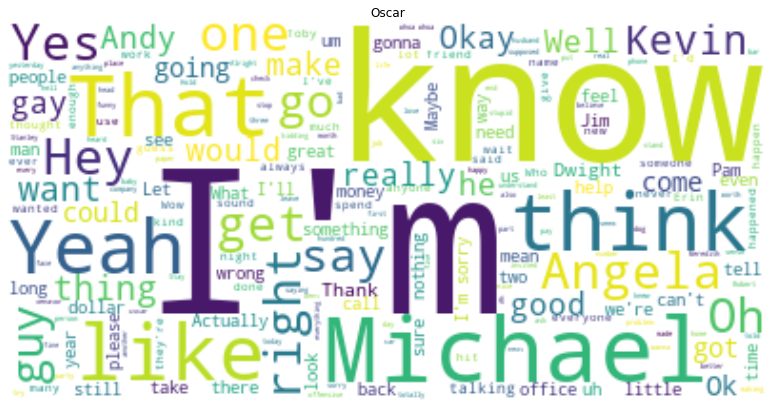

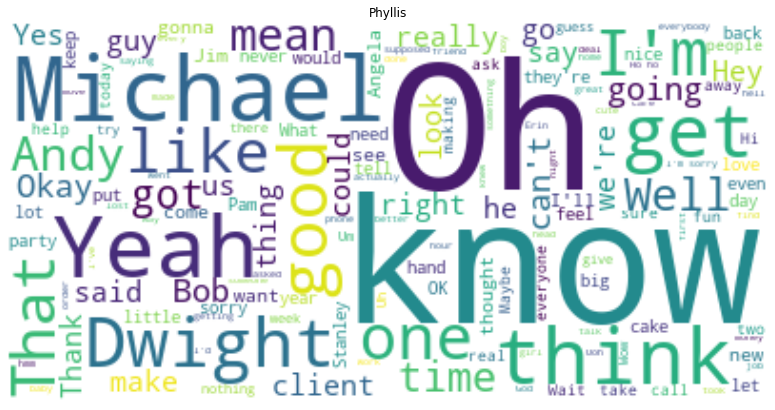

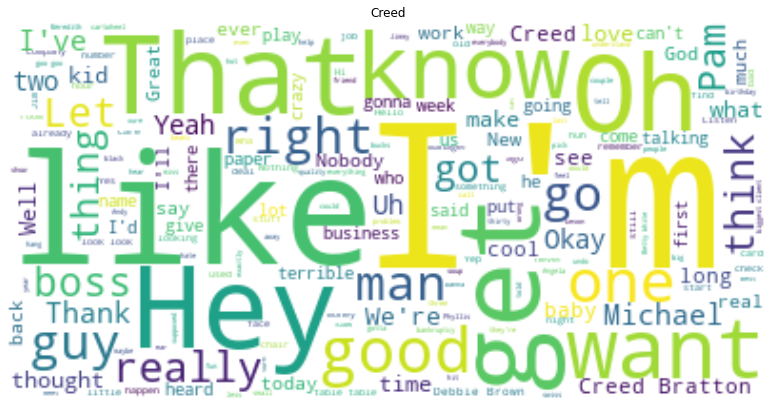

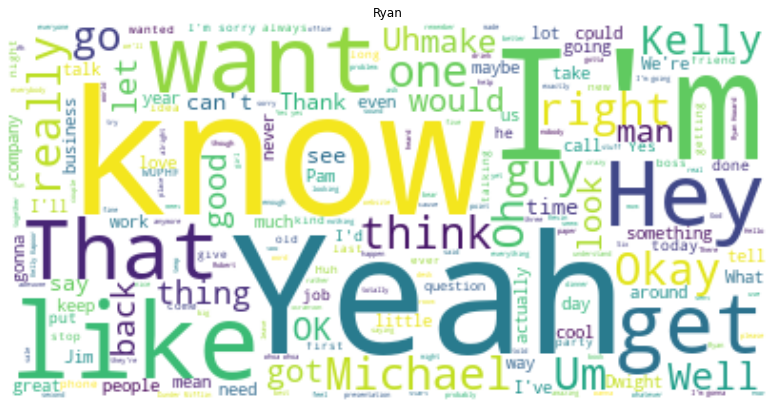

In [12]:
def plotDunder(character, df):
    mydf = df[df.character == character]
    text1 = " ".join(review for review in mydf.text)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(text1)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=[15,7])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(character)
    plt.axis("off")
    plt.show()

fav = ["Michael", "David Wallace", "Dwight", "Jim", "Pam", "Oscar", "Phyllis", "Creed", "Ryan",]
for i in fav: 
  plotDunder(i, df)

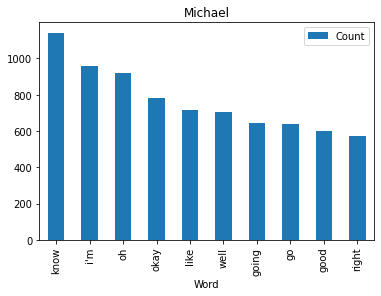

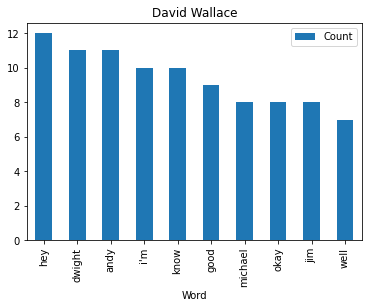

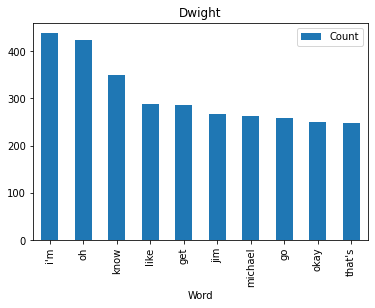

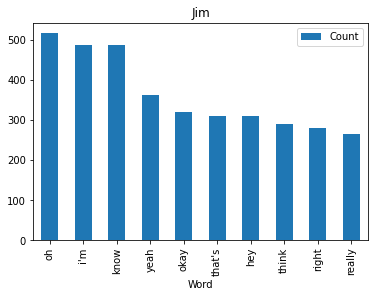

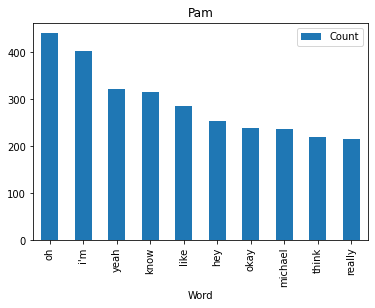

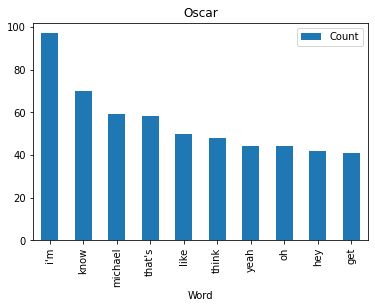

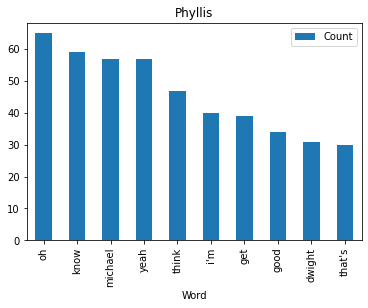

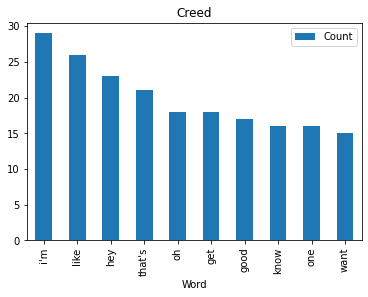

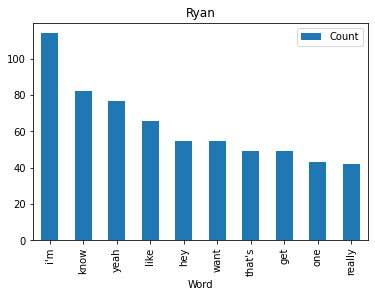

In [13]:
def commonWord(character, df):
    mydf = df[df.character == character]
    text = " ".join(review for review in mydf.text)
    wordcount = {}
    # To eliminate duplicates, remember to split by punctuation, and use case demiliters.
    for word in text.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in stopWords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

    # Print most common word
    n_print = int(10)
#     print("\nOK. The {} most common words are as follows\n".format(n_print))
    word_counter = collections.Counter(wordcount)
    for word, count in word_counter.most_common(n_print):
        pass
    # Close the file
    # Draw a bar chart
    lst = word_counter.most_common(n_print)
    df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    df.plot.bar(x='Word',y='Count', title=character)

for i in fav: 
  commonWord(i, df)